<h2>20156025 _ Sungho Park</h2>
<h4> 1.Load MNIST training dataset.</h4>

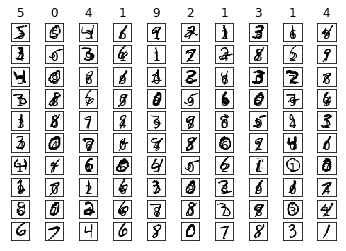

In [1]:
import matplotlib.pyplot as plt
import numpy as np

file_data		= "mnist_train.csv"
handle_file	= open(file_data, "r")
data        		= handle_file.readlines()
handle_file.close()

size_row	= 28    # height of the image
size_col  	= 28    # width of the image

num_image	= len(data)
count       	= 0     # count for the number of images

#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)

#
# example of distance function between two vectors x and y
#
def distance(x, y):

    d = (x - y) ** 2
    s = np.sum(d)
    # r = np.sqrt(s)

    return(s)

#
# make a matrix each column of which represents an images in a vector form 
#
list_image  = np.empty((size_row * size_col, num_image), dtype=float)
list_label  = np.empty(num_image, dtype=int)

for line in data:

    line_data   = line.split(',')
    label       = line_data[0]
    im_vector   = np.asfarray(line_data[1:])
    im_vector   = normalize(im_vector)

    list_label[count]       = label
    list_image[:, count]    = im_vector    

    count += 1

# 
# plot first 100 images out of 10,000 with their labels
# 
f1 = plt.figure(1)

for i in range(100):

    label       = list_label[i]
    im_vector   = list_image[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(10, 10, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()

<h4>2. Compute the average images for each label (digit) based on L2-norm.</h4>

In [8]:
list_norm = np.zeros((size_row*size_col,10),dtype = 'float')   #list allocation

#definition norm2
def norm2(label,img):
    for i in range(size_row*size_col):
        list_norm[i][label] = list_norm[i][label] + list_image[i][img]
    
#norm
for i in range(num_image):
        norm2(list_label[i],i)

#root
for i in range(10):
    for j in range(size_row*size_col):
        list_norm[j][i] = np.sqrt(list_norm[j][i])

<h4>3. Visualize the average images.</h4>

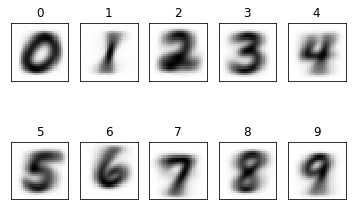

In [9]:
f2 = plt.figure(1)

for i in range(10):

    label       = i
    im_vector   = list_norm[:, i]
    im_matrix   = im_vector.reshape((size_row, size_col))

    plt.subplot(2, 5, i+1)
    plt.title(label)
    plt.imshow(im_matrix, cmap='Greys', interpolation='None')

    frame   = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

plt.show()